#Tutorial on Extracting Quantitative Measures from EEG spectra 

### This exercise makes use of data from the paper 

### Dissociable Decoding of Working Memory and Spatial Attention from EEG Oscillations and Sustained Potentials"

#### Bae, G. Y., & Luck, S. J. (2018). Dissociable Decoding of Spatial Attention and Working Memory from EEG Oscillations and Sustained Potentials. Journal of Neuroscience, 38(2), 409-422.

#### The paper is available in the readings folder.  

## This data set is potentially a very good data set to use for your final project as it is information rich. 

#### Having said that, I dislike many aspects of the paper.  

#### Load modules that we need 

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from hdf5storage import loadmat, savemat 
from scipy.fftpack import fft 
from scipy import signal



In [2]:
data = loadmat('data/wm_orientation_506.mat')



In [3]:
data.keys()


dict_keys(['angle', 'channel', 'channel_names', 'eeg', 'response', 'samplingrate', 'time'])

In [4]:
#extract the variables from the dictionary 
eeg = data['eeg']  #this is the EEG data
channel_names = data['channel_names'] #these are the channel names 
angle = np.int16(data['angle'][0]) #angle of the stimulus to be retained in memory 
response = np.int16(data['response'][0]) #the response angle  
samplingrate = int(data['samplingrate'][0]) #sampling rate of EEG 
time = np.int16(data['time'][0]) #time corresponding to each sample expressed relative to stimulus onset. 
stimsamp = 375 #I looked at time to figure this out.  
ntrials = eeg.shape[0] #number of trials
nchannels = eeg.shape[1] #number of channels 
nsamps = eeg.shape[2] #number of samples 

## README 

![Experiment](img/BaeLuckFigure1.jpg)

### In this experiment, participants are presented tear drops of different orientation for 200 ms.  

### After a delay period of 1300 ms, they rotate an arrow to match the orientation presented. 

### The data presented includes 1500 ms before the stimulus presented, 200 ms of stimulus presentation and 1300 ms of hold period. 

### The response period is not included. 

###  The variables contained here are 


*   `samplingrate` - number of samples of EEG in per second
*   `eeg` - eegdata of the experiment.  of dimensions, ntrials x nchannels x ntimepoints.  The EEG is provided in units of volts. 
*   `time` - the time relative to *stimulus onset* in each EEG observation.
*   `channel_names` - the name of the EEG channels indicating where it is located.    
*   `angle` - the angle of the teardrop stimulus  
*   `response` - the angle reported by the subject. 



## Compute an event-related potential as a reality check 

In [5]:
erp = np.mean(eeg,axis = 0) #average data over all tirals to get the ERP 

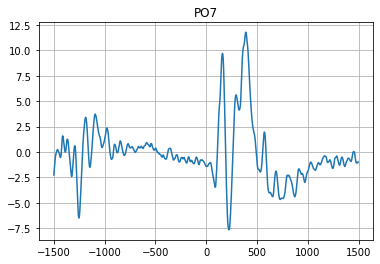

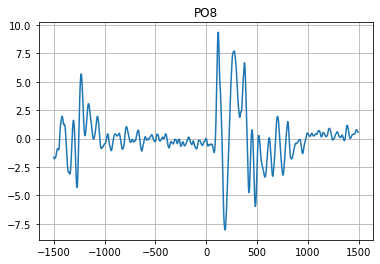

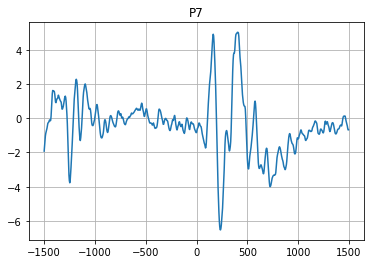

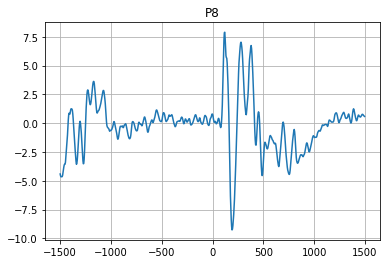

In [6]:
#plot a few channels.  
for j in [11,25,9,22]:
    plt.figure()
    plt.plot(time,np.transpose(erp[j,:]))
    plt.grid()
    plt.title(channel_names[j])


## Spectral Analysis of all of the data simultaneously

### Compute the spectrum prior to stimulus presentation

In [7]:
prestim = range(125,375,1) #This specifies 1 second prior to the stimulus onset 
T = len(prestim)/samplingrate #I automaticallt compute the duration in seconds, should be T=1 here 
deltaf = 1/T # frequency steps depends on the total interval
nsamp = len(prestim) #number of samples in the FFT 
nf = int(nsamp/2) # number of frequencies that can be resolved is 1/2 the number of samples because of Nyquist
frequency = np.arange(0,nf)*deltaf #the actual frequencies 
fft_eeg = fft(eeg[:,:,prestim],axis = 2) #compute the fft over the prescribed interval for all trials and all channels
amplitude = 2*np.abs(fft_eeg)/nsamp/deltaf #comnpute amplitude, nornalize number of samples and deltaf to fix units 

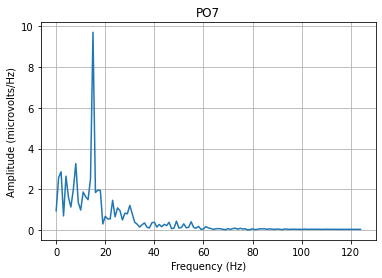

In [8]:
#here we plot the samplitude spectrum of one channel 
trial = 0
channel_left = 11
plt.plot(frequency[range(nf)],amplitude[trial,channel_left,range(nf)])
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.title(channel_names[channel_left])
plt.show()

In [9]:
amplitude_prestim = np.mean(amplitude,axis = 0)

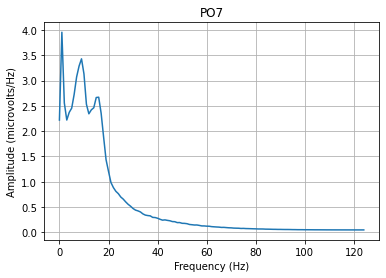

In [10]:
plt.plot(frequency[range(nf)],amplitude_prestim[channel_left,range(nf)])
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.title(channel_names[channel_left])
plt.show()

### Now lets repeat that calculation after the stimulus presentation 

In [11]:
poststim = range(375,625,1)
T = len(poststim)/samplingrate #T = 1 
deltaf = 1/T
nsamp = len(poststim)
nf = int(nsamp/2)
frequency = np.arange(0,nf)*deltaf
fft_eeg = fft(eeg[:,:,poststim],axis = 2)
amplitude = 2*np.abs(fft_eeg)/nsamp/deltaf
amplitude_poststim = np.mean(amplitude,axis = 0)

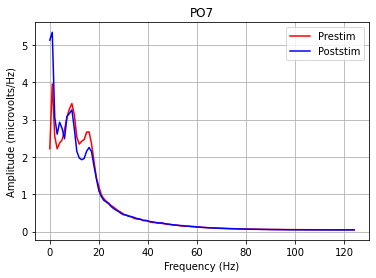

In [12]:
plt.plot(frequency[range(nf)],amplitude_prestim[channel_left,range(nf)],'r')
plt.plot(frequency[range(nf)],amplitude_poststim[channel_left,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend(('Prestim','Poststim'))
plt.title(channel_names[channel_left])
plt.show()

## Let's average the amplitude spectra separately by the angle of the stimulus on each trial.   

In [13]:
amplitude_by_angle = dict() #I made dictionary, you could make a list, or a 3 dimensional array
angle_values = np.unique(angle) #find all the unique values of angle
for j in range(len(angle_values)):
    amplitude_by_angle[angle_values[j]] = np.mean(amplitude[angle == angle_values[j],:,:],axis = 0) #average trials of each angle 

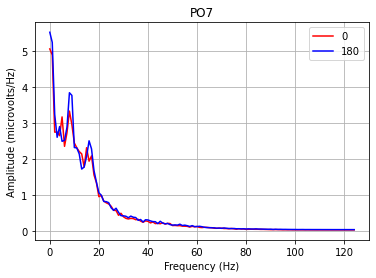

In [14]:
plt.plot(frequency[range(nf)],amplitude_by_angle[0][channel_left,range(nf)],'r')
plt.plot(frequency[range(nf)],amplitude_by_angle[180][channel_left,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title(channel_names[channel_left])
plt.show()

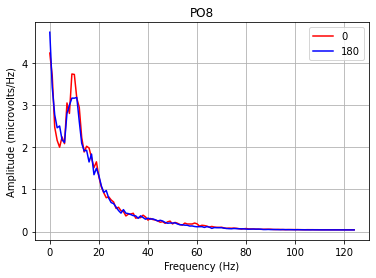

In [15]:
channel_right = 25 #PO8
plt.plot(frequency[range(nf)],amplitude_by_angle[0][channel_right,range(nf)],'r')
plt.plot(frequency[range(nf)],amplitude_by_angle[180][channel_right,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title(channel_names[channel_right])
plt.show()

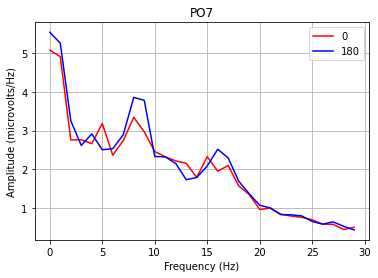

In [16]:
maxf = 30 #highest frequency I want to plot
maxbin = maxf/deltaf #index of highest frequency to plot
channel_left = 11
plt.plot(frequency[range(maxf)],amplitude_by_angle[0][channel_left,range(maxf)],'r')
plt.plot(frequency[range(maxf)],amplitude_by_angle[180][channel_left,range(maxf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title(channel_names[channel_left])
plt.show()


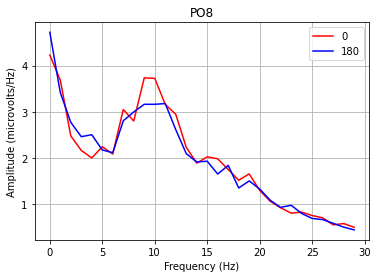

In [18]:
maxf = 30
maxbin = maxf/deltaf
channel_right = 25
plt.plot(frequency[range(maxf)],amplitude_by_angle[0][channel_right,range(maxf)],'r')
plt.plot(frequency[range(maxf)],amplitude_by_angle[180][channel_right,range(maxf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title(channel_names[channel_right])
plt.show()

### How to extract quantitative measures from the spectrum. 
#### When we extract quantitative measures from the spectrum of the signal, we want to extract the amplitude at a frequency for each condition we want to contrast.
##### For example at P08 we can extract the amplitude at 10 Hz for 0 and 180 Hz  

In [19]:
f = 10 #frequency I want to extract from the amplitude spectra
bin = int(f/deltaf) #index corresponding to that frequency 
amplitude_0 = amplitude_by_angle[0][channel_right,bin]
amplitude_180 = amplitude_by_angle[180][channel_right,bin]
print(amplitude_0,amplitude_180)


3.7242927715068235 3.161534082260916


#### In the next example, we can extract the values at all electrodes at 10 Hz and plot them.  


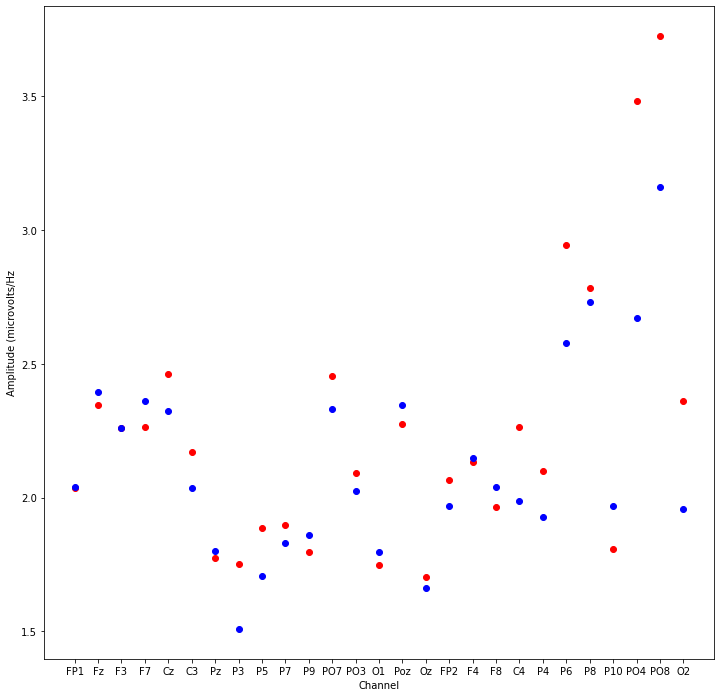

In [20]:
f = 10
bin = int(f/deltaf)
amplitude_0 = amplitude_by_angle[0][:,bin]
amplitude_180 = amplitude_by_angle[180][:,bin]

#lets plot it 
plt.figure(figsize = (12,12))
plt.plot(range(nchannels),amplitude_0,'ro')
plt.plot(range(nchannels),amplitude_180,'bo')
plt.ylabel('Amplitude (microvolts/Hz')
plt.xlabel('Channel')
plt.xticks(range(nchannels),labels = channel_names)
plt.show()


